<a href="https://colab.research.google.com/github/adelynliu/Portfolio/blob/main/CapitalBikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd   # dataFrame handling
import numpy as np    # array, vector, matrix calculations
import matplotlib.pyplot as plt  # plotting
import matplotlib.dates as mdates
import seaborn as sns # slightly better plotting
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

Deal with data from Jan to Apr in 2022

In [15]:
# Define the full path to your CSV files in Google Drive
base_path = '/content/drive/My Drive/Github Project'  # Adjust this path as needed

# Read the CSV files
df_Jan = pd.read_excel(f'{base_path}/202201-capitalbikeshare-tripdata.xlsx')
df_Feb = pd.read_excel(f'{base_path}/202202-capitalbikeshare-tripdata.xlsx')
df_Mar = pd.read_excel(f'{base_path}/202203-capitalbikeshare-tripdata.xlsx')
df_Apr = pd.read_excel(f'{base_path}/202204-capitalbikeshare-tripdata.xlsx')


In [16]:
# concat data
df=pd.concat([df_Jan,df_Feb,df_Mar,df_Apr])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [17]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


### Dealing with time and date

In [18]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual,2022-01-27,2022-01-27
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member,2022-01-07,2022-01-07


### Count daily pickups

In [20]:
# Group and get pickup occurrence for 21st & I St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st & I St NW,7
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,2
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,49
114,2022-04-27,21st & I St NW,67
115,2022-04-28,21st & I St NW,58
116,2022-04-29,21st & I St NW,69


In [21]:
# Group and get pickup occurrence for 21st St & Pennsylvania Ave NW
df_sub2 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['started_at_date','start_station_name']).size()
df_pu_1=df_grp2.reset_index(name = "pu_ct_1")
df_pu_1

,started_at_date,start_station_name,pu_ct_1
0,2022-01-01,21st St & Pennsylvania Ave NW,5
1,2022-01-02,21st St & Pennsylvania Ave NW,1
2,2022-01-03,21st St & Pennsylvania Ave NW,1
3,2022-01-05,21st St & Pennsylvania Ave NW,3
4,2022-01-06,21st St & Pennsylvania Ave NW,5
...,...,...,...
110,2022-04-26,21st St & Pennsylvania Ave NW,22
111,2022-04-27,21st St & Pennsylvania Ave NW,21
112,2022-04-28,21st St & Pennsylvania Ave NW,23
113,2022-04-29,21st St & Pennsylvania Ave NW,23


### Count daily dropoffs

In [22]:
# Group and get drop off occurrence for 21st & I St NW
df_sub3 = df[df['end_station_name']=="21st & I St NW"]
df_grp3 = df_sub3.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp3.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st & I St NW,5
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,6
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,67
114,2022-04-27,21st & I St NW,53
115,2022-04-28,21st & I St NW,57
116,2022-04-29,21st & I St NW,63


In [23]:
# Group and get drop off occurrence for 21st St & Pennsylvania Ave NW
df_sub4 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp4 = df_sub4.groupby(['ended_at_date','end_station_name']).size()
df_do_1=df_grp4.reset_index(name = "do_ct_1")
df_do_1

,ended_at_date,end_station_name,do_ct_1
0,2022-01-01,21st St & Pennsylvania Ave NW,4
1,2022-01-02,21st St & Pennsylvania Ave NW,3
2,2022-01-03,21st St & Pennsylvania Ave NW,2
3,2022-01-04,21st St & Pennsylvania Ave NW,1
4,2022-01-05,21st St & Pennsylvania Ave NW,4
...,...,...,...
114,2022-04-26,21st St & Pennsylvania Ave NW,29
115,2022-04-27,21st St & Pennsylvania Ave NW,29
116,2022-04-28,21st St & Pennsylvania Ave NW,26
117,2022-04-29,21st St & Pennsylvania Ave NW,34


### Visualize pickups and dropoffs

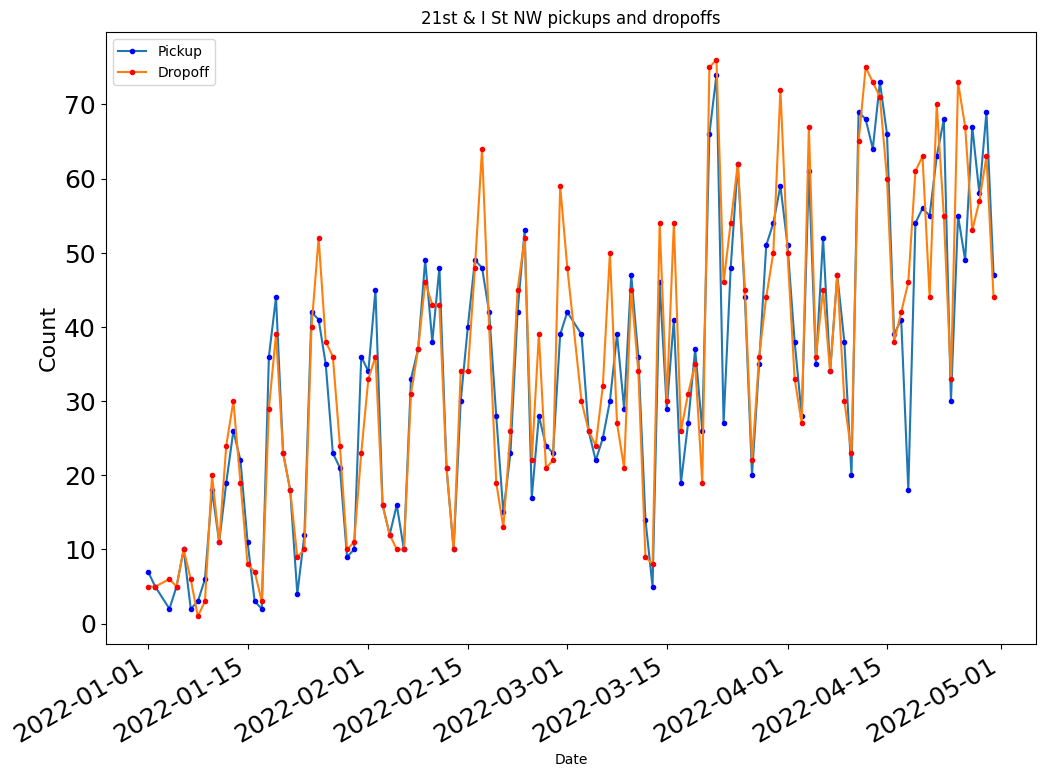

In [24]:
# 21st & I St NW
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.title("21st & I St NW pickups and dropoffs")
plt.legend(['Blue', 'Orange'])
plt.legend(['Pickup', 'Dropoff'])

plt.show()

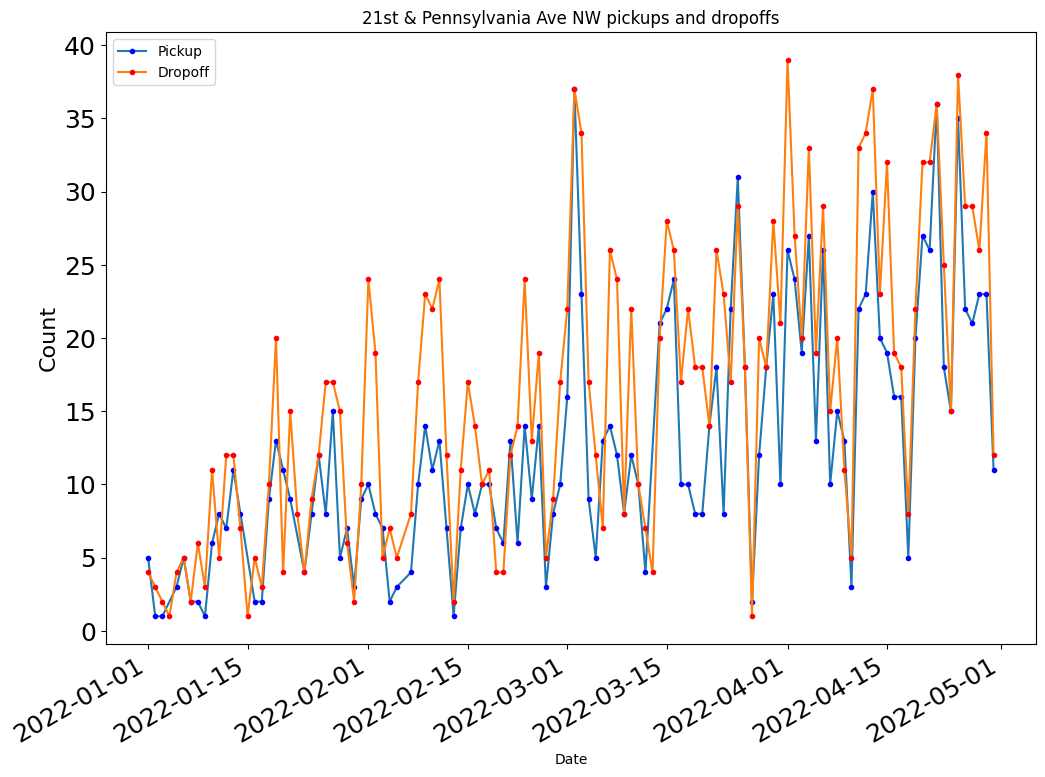

In [25]:
#21st St & Pennsylvania Ave NW
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu_1['started_at_date'], df_pu_1['pu_ct_1'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do_1['ended_at_date'], df_do_1['do_ct_1'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.title("21st & Pennsylvania Ave NW pickups and dropoffs")
plt.legend(['Blue', 'Orange'])
plt.legend(['Pickup', 'Dropoff'])

plt.show()

## Weather Data

In [ ]:
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

## Check missing values

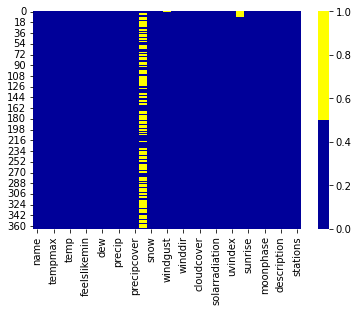

In [ ]:
# Date time format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

In [ ]:
import pandas as pd
missing_values_count = df_weather.isna().sum()
missing_values_sorted = missing_values_count.sort_values(ascending=False)
top_5_missing_columns = missing_values_sorted.head(5)
print(top_5_missing_columns)

preciptype     231
severerisk       9
windgust         3
description      0
conditions       0
dtype: int64


In [ ]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge weather data with trip data

In [ ]:
# Merge with weather data and 21st & I St NW. Remove dates and station name

df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime')
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime')
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])

In [ ]:
df_m_pu.head()

,pu_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,7,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,5,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,...,14.1,192.1,1029.7,18.7,9.9,153.2,5.4,6,0.02,snow
3,5,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,10,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow


In [ ]:
# Merge with weather data and 21st St & Pennsylvania Ave NW. Remove dates and station name

df_m_pu_1 = df_pu_1.merge(df_weather, left_on='started_at_date', right_on='datetime')
df_m_pu_1 = df_m_pu_1.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do_1 = df_do_1.merge(df_weather, left_on='ended_at_date', right_on='datetime')
df_m_do_1 = df_m_do_1.drop(columns=['ended_at_date','end_station_name','datetime'])

In [ ]:
df_m_pu_1.head()

,pu_ct_1,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,5,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,1,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,...,22.5,358.5,1019.7,77.2,6.2,6.3,0.0,0,0.00,snow
3,3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,5,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow


# Models:  For 21st & I St NW

### train linear models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# pick-up
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                   0.431837
tempmin                   0.448190
temp                     -1.871509
feelslikemax             -0.538638
feelslikemin             -0.896445
feelslike                 1.318472
dew                       2.196419
humidity                 -1.363480
precip                    4.108471
precipprob                0.015612
precipcover              -0.207099
snow                     -2.908279
snowdepth                 0.065122
windspeed                -1.213763
winddir                   0.032159
sealevelpressure          0.162454
cloudcover                0.101044
visibility               -0.653260
solarradiation           -0.249588
solarenergy               3.458863
uvindex                  -0.331106
moonphase                 4.358135
icon_partly-cloudy-day   -1.570322
icon_rain                -3.090264
icon_snow                 4.660585
icon_wind                 0.000000
dtype: float64


In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 213.572


### Lasso CV

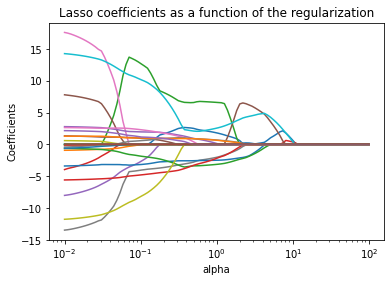

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
sort = coef.sort_values(ascending = False)
print(sort)

The coefficients are:


NameError: name 'coef' is not defined

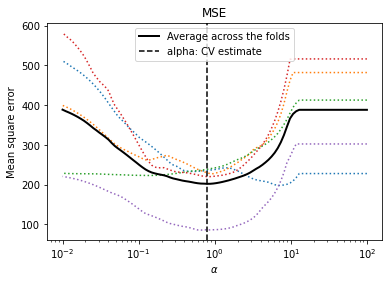

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 143.928


In [ ]:
X_test.iloc[[1]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
66,51.8,36.5,44.5,51.8,30.0,41.9,31.6,63.1,0.0,0,...,87.6,9.6,100.8,8.6,5,0.25,1,0,0,0


In [ ]:
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[1]]))
print(y_pred1)

NameError: name 'scaler' is not defined

In [ ]:
y_test.iloc[[1]]

66    47
Name: pu_ct, dtype: int64

In [ ]:
X_test.iloc[[2]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
34,34.9,26.6,31.2,24.7,17.2,20.8,14.2,49.7,0.0,0,...,45.2,9.9,104.9,9.2,6,0.11,1,0,0,0


In [ ]:
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[2]]))
print(y_pred1)

[22.94758869]


In [ ]:
y_test.iloc[[2]]

34    16
Name: pu_ct, dtype: int64

### KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)
# Training MSE
mse_train = mean_squared_error(y_train, model.predict(X_train))
# Test MSE
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("Training MSE", mse_train)
print("Test MSE", mse_test)

Training MSE 260.0858571428572
Test MSE 245.850625


In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

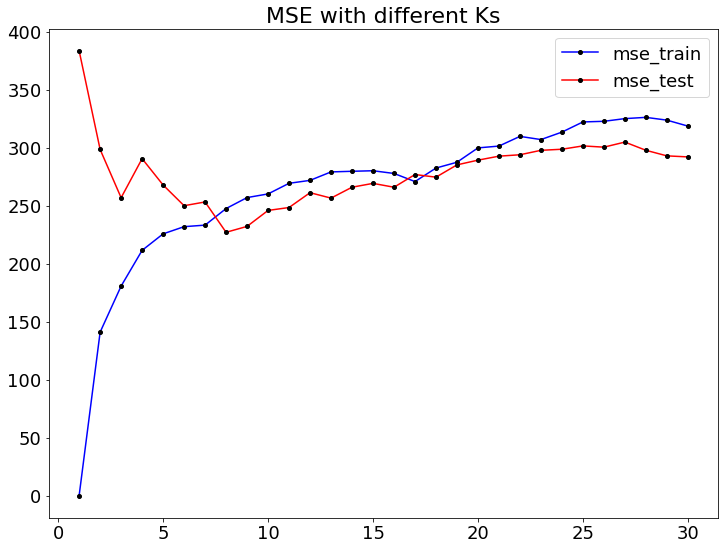

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

8

In [ ]:
# optimal MSE
min(mse_test)

226.99739583333334

### Ridge CV

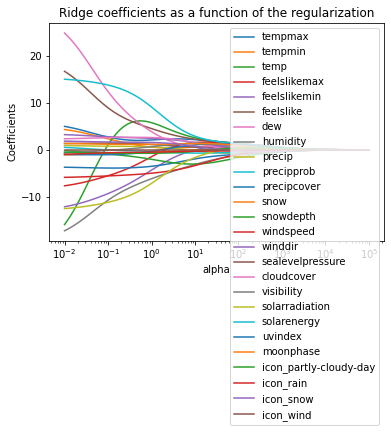

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.518914
tempmin                   0.417278
temp                      0.501468
feelslikemax              0.516175
feelslikemin              0.434726
feelslike                 0.505465
dew                       0.256249
humidity                 -0.323599
precip                   -0.318611
precipprob               -0.249697
precipcover              -0.360155
snow                     -0.279665
snowdepth                -0.403603
windspeed                -0.159882
winddir                   0.080501
sealevelpressure          0.042812
cloudcover               -0.162258
visibility                0.296259
solarradiation            0.353997
solarenergy               0.496237
uvindex                   0.468611
moonphase                 0.205383
icon_partly-cloudy-day    0.286303
icon_rain                -0.068904
icon_snow                -0.305114
icon_wind                 0.000000
dtype: float64


In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** 

In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.528190
tempmin                   0.953324
temp                      1.504584
feelslikemax              1.443118
feelslikemin              0.936046
feelslike                 1.482091
dew                       0.544671
humidity                 -1.423951
precip                   -0.710783
precipprob               -0.583724
precipcover              -1.057026
snow                     -0.253508
snowdepth                -2.001615
windspeed                -1.306707
winddir                   0.559955
sealevelpressure          0.280232
cloudcover                0.089480
visibility                1.014818
solarradiation            0.228772
solarenergy               1.461669
uvindex                   1.220681
moonphase                 1.081979
icon_partly-cloudy-day    0.336282
icon_rain                -0.206719
icon_snow                -0.204678
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 147.98


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8441537223475757


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.787805
tempmin                   0.732949
temp                      1.822107
feelslikemax              1.605643
feelslikemin              0.684583
feelslike                 1.779751
dew                       0.070541
humidity                 -1.589035
precip                   -0.578261
precipprob               -0.506038
precipcover              -1.276274
snow                     -0.000000
snowdepth                -2.460448
windspeed                -1.725519
winddir                   0.483840
sealevelpressure          0.000000
cloudcover                0.000000
visibility                1.080337
solarradiation            0.000000
solarenergy               1.708672
uvindex                   1.202641
moonphase                 1.064203
icon_partly-cloudy-day    0.085965
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 144.573


# Models:  For 21st & I St NW

### train linear model

In [ ]:
#drop-off
y = df_m_do['do_ct']
X = df_m_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                    0.685609
tempmin                    1.325933
temp                      -4.087984
feelslikemax              -0.743661
feelslikemin              -1.411161
feelslike                  1.422090
dew                        4.354584
humidity                  -2.334513
precip                    13.481857
precipprob                 0.075972
precipcover               -0.301099
snow                      -3.270237
snowdepth                  1.567371
windspeed                 -1.300018
winddir                    0.016408
sealevelpressure           0.329531
cloudcover                 0.038046
visibility                -0.885912
solarradiation            -0.327798
solarenergy                4.079766
uvindex                   -0.250852
moonphase                  9.744829
icon_partly-cloudy-day     2.519802
icon_rain                 -2.591437
icon_snow                  0.071634
icon_wind                  0.000000
dtype: float64


In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 233.961


### Lasso

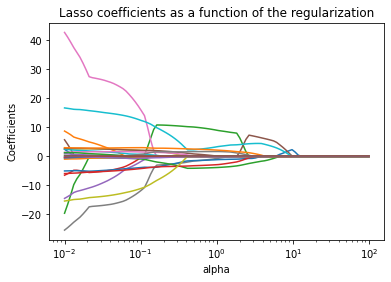

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
sort = coef.sort_values(ascending = False)
print(sort)

The best alpha from LassoCV: 0.7220809018385468
The coefficients are:
temp                      6.690140
solarenergy               2.318058
tempmax                   2.061753
visibility                0.790024
moonphase                 0.765663
winddir                   0.481611
icon_snow                 0.000000
icon_rain                -0.000000
icon_partly-cloudy-day    0.000000
uvindex                   0.000000
solarradiation           -0.000000
cloudcover                0.000000
sealevelpressure          0.000000
icon_wind                 0.000000
tempmin                   0.000000
snow                      0.000000
precipprob               -0.000000
precip                   -0.000000
dew                       0.000000
feelslike                 0.000000
feelslikemin              0.000000
feelslikemax              0.000000
humidity                 -2.245071
precipcover              -2.495638
windspeed                -2.590788
snowdepth                -3.228062
dtype: float64


In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 133.142


In [ ]:
X_test.iloc[[1]]
y_pred1 = ridge.predict(scaler.transform(X_test.iloc[[1]]))
print(y_pred1)
y_test.iloc[[1]]

[14.02146198]


66    45
Name: do_ct, dtype: int64

In [ ]:
X_test.iloc[[2]]
y_pred1 = ridge.predict(scaler.transform(X_test.iloc[[2]]))
print(y_pred1)
y_test.iloc[[2]]

[7.44538505]


34    10
Name: do_ct, dtype: int64

### KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)
# Training MSE
mse_train = mean_squared_error(y_train, model.predict(X_train))
# Test MSE
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("Training MSE", mse_train)
print("Test MSE", mse_test)

Training MSE 339.5687142857143
Test MSE 243.1675


In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

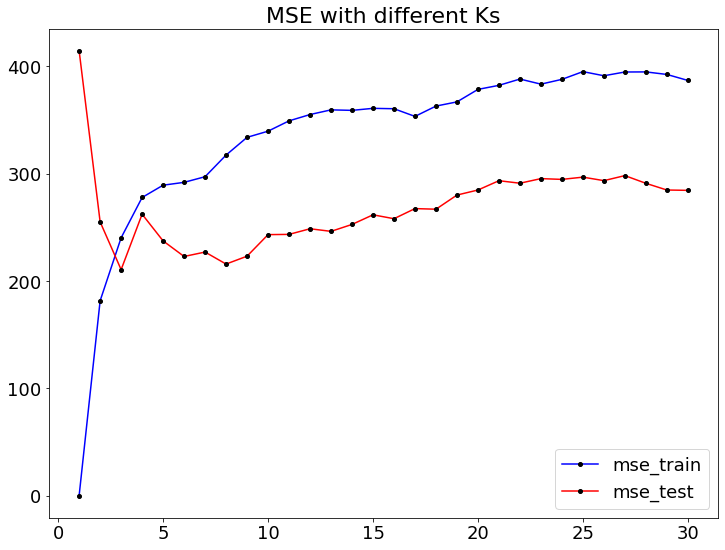

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

3

In [ ]:
# optimal MSE
min(mse_test)

210.54398148148144

### Ridge CV

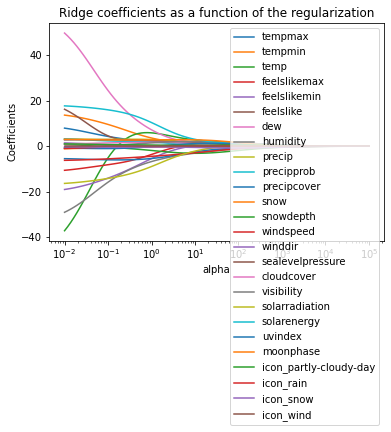

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.559432
tempmin                   0.484031
temp                      0.552915
feelslikemax              0.550496
feelslikemin              0.499554
feelslike                 0.556414
dew                       0.324602
humidity                 -0.282567
precip                   -0.246181
precipprob               -0.204025
precipcover              -0.327348
snow                     -0.352540
snowdepth                -0.468283
windspeed                -0.202698
winddir                  -0.041886
sealevelpressure          0.085110
cloudcover               -0.145991
visibility                0.274305
solarradiation            0.327188
solarenergy               0.485850
uvindex                   0.453176
moonphase                 0.303217
icon_partly-cloudy-day    0.293995
icon_rain                 0.001099
icon_snow                -0.401111
icon_wind                 0.000000
dtype: float64


In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** 

In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.523963
tempmin                   1.239480
temp                      1.612245
feelslikemax              1.343719
feelslikemin              1.141592
feelslike                 1.527834
dew                       0.768023
humidity                 -1.343253
precip                   -0.174455
precipprob               -0.275417
precipcover              -1.028967
snow                     -0.564660
snowdepth                -2.225236
windspeed                -1.389369
winddir                  -0.427958
sealevelpressure          0.705765
cloudcover               -0.001681
visibility                1.125455
solarradiation            0.065044
solarenergy               1.417056
uvindex                   1.168872
moonphase                 1.882597
icon_partly-cloudy-day    0.516309
icon_rain                 0.076098
icon_snow                -0.795052
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 128.597


### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8000497261907156


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.709979
tempmin                   1.225950
temp                      1.971675
feelslikemax              1.301766
feelslikemin              0.974971
feelslike                 1.783743
dew                       0.482155
humidity                 -1.476576
precip                   -0.000000
precipprob               -0.000000
precipcover              -1.203158
snow                     -0.259797
snowdepth                -2.780053
windspeed                -1.917766
winddir                  -0.223894
sealevelpressure          0.662049
cloudcover                0.000000
visibility                1.333035
solarradiation           -0.000000
solarenergy               1.625183
uvindex                   1.040007
moonphase                 2.185131
icon_partly-cloudy-day    0.281284
icon_rain                -0.000000
icon_snow                -0.697454
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 129.268


## Models : For 21st St & Pennsylvania Ave NW

### train linear model

In [ ]:
#pick-up
y = df_m_pu_1['pu_ct_1']
X = df_m_pu_1.drop('pu_ct_1',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                   0.945492
tempmin                   0.445349
temp                     -2.031484
feelslikemax             -0.771055
feelslikemin             -0.679134
feelslike                 0.764571
dew                       1.862416
humidity                 -0.916568
precip                   -2.382399
precipprob               -0.004082
precipcover              -0.075051
snow                     -0.114305
snowdepth                 0.746721
windspeed                -0.676991
winddir                   0.014838
sealevelpressure         -0.195860
cloudcover                0.033615
visibility               -2.954038
solarradiation           -0.074035
solarenergy               1.292846
uvindex                   0.718006
moonphase                 1.677679
icon_partly-cloudy-day    4.111127
icon_rain                 3.979878
icon_snow                 2.609011
icon_wind                 0.000000
dtype: float64


In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 47.308


### LASSO

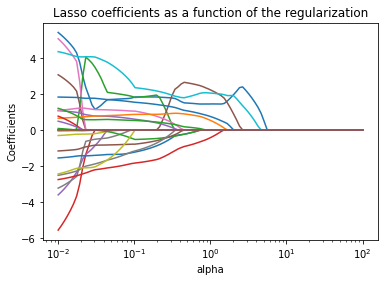

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
coef = pd.Series(lasso.coef_.flatten(), index=X_train.columns)
sort = coef.sort_values(ascending = False)
print(sort)

The coefficients are:
feelslike                 2.410625
solarenergy               2.061292
tempmax                   1.439375
uvindex                   0.869532
moonphase                 0.704540
icon_partly-cloudy-day    0.037787
winddir                   0.000000
icon_snow                -0.000000
icon_rain                -0.000000
solarradiation            0.000000
visibility               -0.000000
cloudcover                0.000000
sealevelpressure         -0.000000
icon_wind                 0.000000
tempmin                   0.000000
snowdepth                -0.000000
snow                     -0.000000
precipcover              -0.000000
precipprob               -0.000000
precip                   -0.000000
humidity                 -0.000000
dew                       0.000000
feelslikemin              0.000000
feelslikemax              0.000000
temp                      0.000000
windspeed                -0.611661
dtype: float64


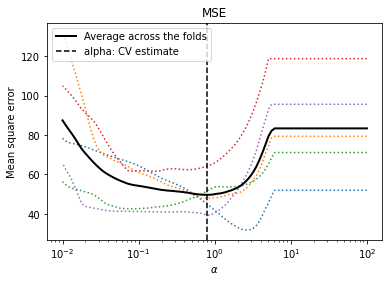

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 26.123


In [ ]:
X_test.iloc[[1]]
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[1]]))
print(y_pred1)
y_test.iloc[[1]]

NameError: ignored

In [ ]:
X_test.iloc[[2]]
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[2]]))
print(y_pred1)
y_test.iloc[[2]]

[16.28220046]


60    13
Name: pu_ct_1, dtype: int64

### KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)
# Training MSE
mse_train = mean_squared_error(y_train, model.predict(X_train))
# Test MSE
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("Training MSE", mse_train)
print("Test MSE", mse_test)

Training MSE 58.84391304347826
Test MSE 38.07804347826087


In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

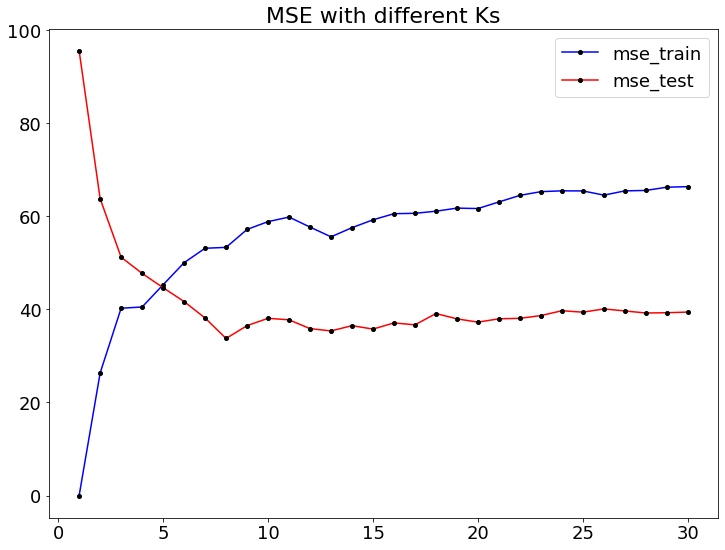

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

8

In [ ]:
# optimal MSE
min(mse_test)

33.74422554347826

### Ridge CV

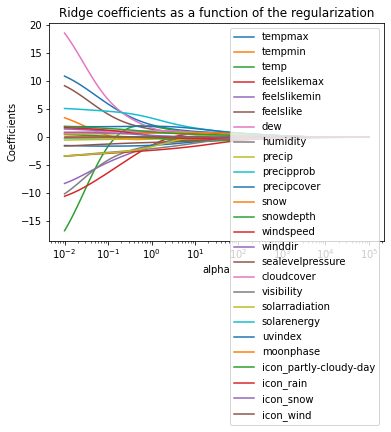

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.258847
tempmin                   0.199451
temp                      0.240523
feelslikemax              0.255292
feelslikemin              0.214795
feelslike                 0.244293
dew                       0.161576
humidity                 -0.073548
precip                   -0.113853
precipprob               -0.092732
precipcover              -0.140055
snow                     -0.114542
snowdepth                -0.141057
windspeed                -0.093619
winddir                   0.030979
sealevelpressure         -0.018822
cloudcover               -0.026863
visibility                0.061176
solarradiation            0.182837
solarenergy               0.235042
uvindex                   0.221777
moonphase                 0.103182
icon_partly-cloudy-day    0.131633
icon_rain                -0.038435
icon_snow                -0.127854
icon_wind                 0.000000
dtype: float64


In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** 

In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.739769
tempmin                   0.425433
temp                      0.632092
feelslikemax              0.707050
feelslikemin              0.483291
feelslike                 0.652014
dew                       0.431116
humidity                 -0.138160
precip                   -0.300445
precipprob               -0.211971
precipcover              -0.460662
snow                     -0.153124
snowdepth                -0.540307
windspeed                -0.755955
winddir                   0.177708
sealevelpressure         -0.196798
cloudcover                0.198665
visibility               -0.223754
solarradiation            0.468011
solarenergy               0.874738
uvindex                   0.865579
moonphase                 0.631625
icon_partly-cloudy-day    0.368992
icon_rain                -0.205668
icon_snow                -0.122010
icon_wind                 0.000000
dtype: float64


In [ ]:
# Step 1: Select the top 5 coefficients
coef = pd.Series(ridge.coef_.flatten(), index=X_train.columns)
sort = coef.sort_values(ascending=False)
top_5 = sort[:5].index.tolist()

# Step 2: Select corresponding X values from the df_m_do_1 dataframe
X_top5 = df_m_pu_1[top_5]

# Step 3: Get corresponding coefficient values
coef_top5 = coef[top_5]

# Step 4: Calculate predicted y values
y_pred = np.dot(X_top5, coef_top5)
print(y_pred[:5])
print(df_m_pu_1[top_5])

[130.41024142 130.23295896  76.88345125  78.50923576  91.55682447]
     solarenergy  uvindex  tempmax  feelslikemax  feelslike
0            0.6        0     63.5          63.5       58.3
1            1.7        1     62.7          62.7       57.0
2            0.0        0     46.0          39.4       23.0
3            2.2        1     40.8          37.2       29.5
4            5.3        4     42.9          40.6       35.3
..           ...      ...      ...           ...        ...
110          3.8        2     70.9          70.9       62.1
111         11.3        9     61.8          61.8       53.4
112         11.3       10     60.0          60.0       44.7
113         11.2       10     65.8          65.8       53.4
114         10.0        7     66.9          66.9       55.7

[115 rows x 5 columns]


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 31.032


### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8423899729961688


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.861469
tempmin                   0.266375
temp                      0.704586
feelslikemax              0.806870
feelslikemin              0.424762
feelslike                 0.764944
dew                       0.194916
humidity                 -0.000000
precip                   -0.090745
precipprob               -0.000000
precipcover              -0.458301
snow                     -0.000000
snowdepth                -0.423528
windspeed                -0.714385
winddir                   0.000000
sealevelpressure         -0.000000
cloudcover                0.000000
visibility               -0.000000
solarradiation            0.167506
solarenergy               1.101774
uvindex                   1.032898
moonphase                 0.610440
icon_partly-cloudy-day    0.345409
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 28.391


In [ ]:
#drop-off
y = df_m_do_1['do_ct_1']
X = df_m_do_1.drop('do_ct_1',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                    0.961719
tempmin                    1.469004
temp                      -5.040983
feelslikemax              -0.695351
feelslikemin              -0.791879
feelslike                  2.046496
dew                        2.516393
humidity                  -1.142848
precip                    15.216122
precipprob                 0.106878
precipcover               -0.173749
snow                      -1.289838
snowdepth                  1.328512
windspeed                 -0.547111
winddir                    0.012148
sealevelpressure           0.118925
cloudcover                -0.016294
visibility                 0.228567
solarradiation            -0.140639
solarenergy                2.551903
uvindex                    0.262377
moonphase                  0.094145
icon_partly-cloudy-day    -1.357301
icon_rain                 -8.124269
icon_snow                 -4.239596
icon_wind                 13.721166
dtype: float64


In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 55.297


### Lasso CV

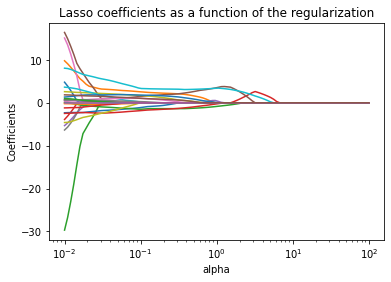

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 1.0476157527896652


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
coef = pd.Series(lasso.coef_.flatten(), index=X_train.columns)
sort = coef.sort_values(ascending = False) #
print(sort)

The coefficients are:
feelslike                 3.599647
solarenergy               3.418568
feelslikemin              0.327060
tempmax                   0.000000
winddir                  -0.000000
icon_snow                -0.000000
icon_rain                -0.000000
icon_partly-cloudy-day    0.000000
moonphase                 0.000000
uvindex                   0.000000
solarradiation            0.000000
visibility               -0.000000
cloudcover                0.000000
sealevelpressure         -0.000000
icon_wind                 0.000000
tempmin                   0.000000
snow                     -0.000000
precipcover              -0.000000
precipprob               -0.000000
precip                    0.000000
humidity                 -0.000000
dew                       0.000000
feelslikemax              0.000000
temp                      0.000000
windspeed                -0.205237
snowdepth                -0.807590
dtype: float64


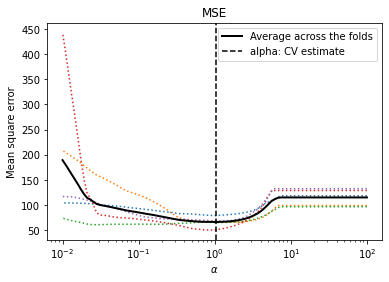

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print("MSE is",mse)

MSE is 44.019


In [ ]:
X_test.iloc[[1]]
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[1]]))
print(y_pred1)
y_test.iloc[[1]]

[32.76642013]


84    1
Name: do_ct_1, dtype: int64

In [ ]:
X_test.iloc[[2]]
y_pred1 = lasso.predict(scaler.transform(X_test.iloc[[2]]))
print(y_pred1)
y_test.iloc[[2]]

[21.96668909]


53    13
Name: do_ct_1, dtype: int64

### KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)
# Training MSE
mse_train = mean_squared_error(y_train, model.predict(X_train))
# Test MSE
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("Training MSE", mse_train)
print("Test MSE", mse_test)

Training MSE 73.57830985915491
Test MSE 67.39604166666668


In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

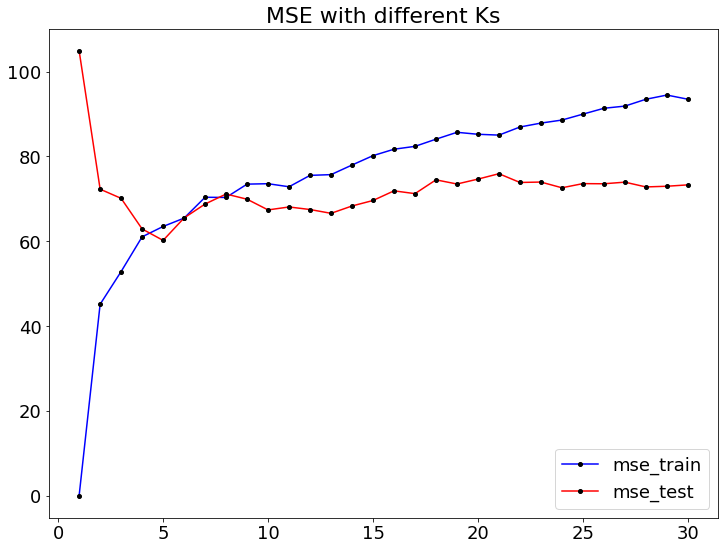

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

5

In [ ]:
# optimal MSE
min(mse_test)

60.203333333333326

### Ridge CV

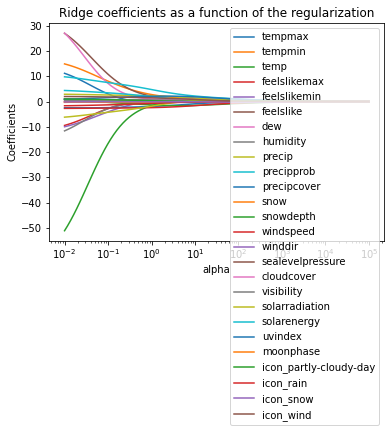

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.295143
tempmin                   0.262055
temp                      0.279468
feelslikemax              0.297632
feelslikemin              0.265070
feelslike                 0.286310
dew                       0.200909
humidity                 -0.069020
precip                   -0.011522
precipprob               -0.078239
precipcover              -0.098449
snow                     -0.141635
snowdepth                -0.199560
windspeed                -0.105978
winddir                  -0.032831
sealevelpressure         -0.020416
cloudcover               -0.033252
visibility                0.050916
solarradiation            0.205365
solarenergy               0.296557
uvindex                   0.270233
moonphase                 0.036803
icon_partly-cloudy-day    0.127306
icon_rain                -0.019229
icon_snow                -0.166372
icon_wind                 0.020344
dtype: float64


In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 91.11627561154887


/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/adelynliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** 

In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.688827
tempmin                   0.661080
temp                      0.628574
feelslikemax              0.707139
feelslikemin              0.645375
feelslike                 0.690052
dew                       0.421286
humidity                 -0.264895
precip                    0.363174
precipprob               -0.148959
precipcover              -0.253318
snow                     -0.252407
snowdepth                -0.790958
windspeed                -0.592003
winddir                  -0.241460
sealevelpressure          0.003398
cloudcover                0.024008
visibility                0.043181
solarradiation            0.591483
solarenergy               1.072380
uvindex                   0.979593
moonphase                 0.099427
icon_partly-cloudy-day    0.226299
icon_rain                -0.111539
icon_snow                -0.248384
icon_wind                 0.170422
dtype: float64


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 45.02


### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 1.0416537784732232


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.714861
tempmin                   0.676185
temp                      0.602646
feelslikemax              0.751377
feelslikemin              0.674009
feelslike                 0.755253
dew                       0.100810
humidity                 -0.000000
precip                    0.000000
precipprob               -0.000000
precipcover              -0.000000
snow                     -0.024925
snowdepth                -0.980634
windspeed                -0.611327
winddir                  -0.033402
sealevelpressure         -0.000000
cloudcover                0.000000
visibility                0.000000
solarradiation            0.315626
solarenergy               1.484841
uvindex                   1.190868
moonphase                 0.000000
icon_partly-cloudy-day    0.106373
icon_rain                -0.000000
icon_snow                -0.068391
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 44.231
